In [51]:
import pandas as pd
import seaborn as sns
#reading freesurfer results
out_dir = '/output'
fsdata_file = out_dir+'/freesurfer_out.csv'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);

## 1. basics: age, diagnosis
## 2. subcortical and basic segmentation 
# Basal Ganglia: Left-Caudate, Right-Caudate, Left-Pallidum, Right-Pallidum, Left-Putamen, Right-Putamen, 
#                Left-Thalamus-Proper, Right-Thalamus-Proper
# sub-cortical: SubCortGrayVol, Left-Accumbens-area, Right-Accumbens-area, Left-Amygdala, Right-Amygdala, Left-Hippocampus, Right-Hippocampus,  	
# Ventricles: CSF, Left-Lateral-Ventricle, Right-Lateral-Ventricle, 3rd-Ventricle, 4th-Ventricle, 5th-Ventricle,
#             Left-VentralDC, Left-VentralDC, (Ventral Diencephalon)
# Ventricles unknown: Left-Inf-Lat-Vent, Right-Inf-Lat-Vent, Right-VentralDC
# CC: CC_Anterior, CC_Mid_Anterior, CC_Central, CC_Mid_Posterior, CC_Posterior
# Brain-Stem: Brain-Stem, Accumbens, Left-choroid-plexus, Right-choroid-plexus,
# Cerebellum: Left-Cerebellum-Cortex, Right-Cerebellum-Cortex, Left-Cerebellum-White-Matter, Right-Cerebellum-White-Matter
# Vol sum: CortexVol, TotalGrayVolCortexVol, SubCortGrayVol, CerebralWhiteMatterVol,   
#          SupraTentorialVol, SupraTentorialVolNotVentVox, SupraTentorialVolNotVent, 
#          EstimatedTotalIntraCranialVol (eTIV), 
#          (lhCortexVol, rhCortexVol),  (lhCerebralWhiteMatterVol, rhCerebralWhiteMatterVol), 
# lesion: WM-hypointensities, (Left-WM-hypointensities, Right-WM-hypointensities),
#         non-WM-hypointensities (Left-non-WM-hypointensities, Right-non-WM-hypointensities),
# others in brain: Optic-Chiasm, Left-vessel, Right-vessel,
#                  BrainSegVol, BrainSegVolNotVent, BrainSegVolNotVentSurf, BrainSegVol-to-eTIV, MaskVol-to-eTIV, 
# others non-brain:  MaskVol, SurfaceHoles, lhSurfaceHoles, rhSurfaceHoles

## White Matter in Desikan Region
# Sum: CerebralWhiteMatterVol, MaskVol, EstimatedTotalIntraCranialVol, (lhCerebralWhiteMatterVol, rhCerebralWhiteMatterVol), 
# Left: wm-lh-bankssts, wm-lh-caudalanteriorcingulate, wm-lh-caudalmiddlefrontal, wm-lh-cuneus, wm-lh-entorhinal, wm-lh-fusiform,
# wm-lh-inferiorparietal, wm-lh-inferiortemporal, wm-lh-isthmuscingulate, wm-lh-lateraloccipital, wm-lh-lateralorbitofrontal, 
# wm-lh-lingual, wm-lh-medialorbitofrontal, wm-lh-middletemporal, wm-lh-parahippocampal, wm-lh-paracentral, wm-lh-parsopercularis, wm-lh-parsorbitalis
# wm-lh-parstriangularis, wm-lh-pericalcarine, wm-lh-postcentral, wm-lh-posteriorcingulate, wm-lh-precentral, wm-lh-precuneus, wm-lh-rostralanteriorcingulate
# wm-lh-rostralmiddlefrontal, wm-lh-superiorfrontal, wm-lh-superiorparietal, wm-lh-superiortemporal, wm-lh-supramarginal, wm-lh-frontalpole, 
# wm-lh-temporalpole, wm-lh-transversetemporal, wm-lh-insula, 
# Right: wm-rh-bankssts, wm-rh-caudalanteriorcingulate, wm-rh-caudalmiddlefrontal, wm-rh-cuneus, wm-rh-entorhinal, wm-rh-fusiform,
# wm-rh-inferiorparietal, wm-rh-inferiortemporal, wm-rh-isthmuscingulate, wm-rh-lateraloccipital, wm-rh-lateralorbitofrontal,
# wm-rh-lingual, wm-rh-medialorbitofrontal, wm-rh-middletemporal, wm-rh-parahippocampal, wm-rh-paracentral, wm-rh-parsopercularis, wm-rh-parsorbitalis
# wm-rh-parstriangularis, wm-rh-pericalcarine, wm-rh-postcentral, wm-rh-posteriorcingulate, wm-rh-precentral, wm-rh-precuneus, wm-rh-rostralanteriorcingulate
# wm-rh-rostralmiddlefrontal, wm-rh-superiorfrontal, wm-rh-superiorparietal, wm-rh-superiortemporal, wm-rh-supramarginal, wm-rh-frontalpole,
# wm-rh-temporalpole, wm-rh-transversetemporal, wm-rh-insula, 
# others: Left-UnsegmentedWhiteMatter, Right-UnsegmentedWhiteMatter	
    
## 3. cortical parcellation

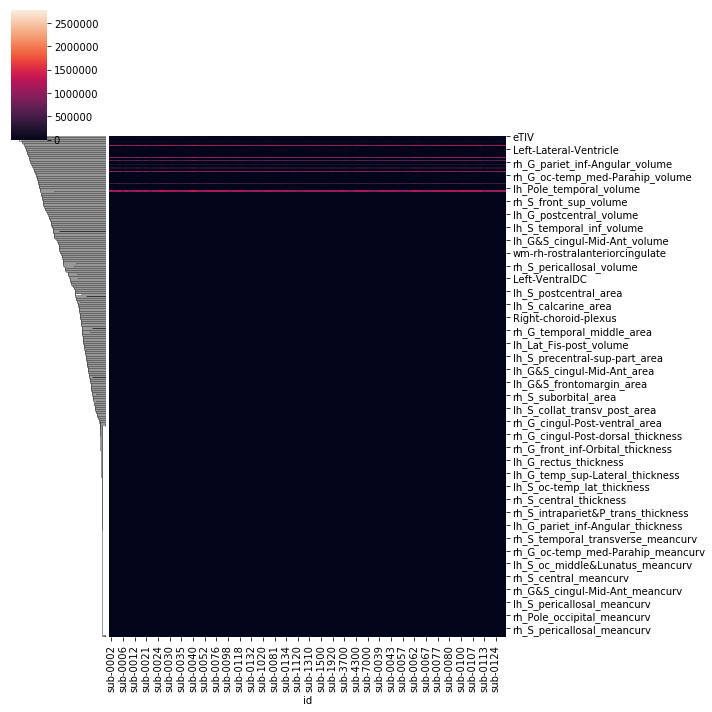

In [78]:
# for test
import numpy as np
from matplotlib import pyplot as plt
def diagnosis2num(diagnosis):
    if diagnosis == "PD":
        return 1
    elif diagnosis == "ET":
        return -1
    elif diagnosis == "NC":
        return 0
    else:
        print("diagnosis input error...")
        return ""
num_data = tab_data.copy(deep=True);
num_data["pd_nc_et"] = num_data['diagnosis'].apply(lambda v: diagnosis2num(v))
num_data.loc[:,['sex']] = [1 if x == 'M' else 0 for x in num_data['sex'] ]
num_data.drop(['diagnosis'], axis=1, inplace=True)
g = sns.clustermap(num_data.T, metric="mahalanobis", col_cluster=False)

In [95]:
help(g)
g.dim

Help on ClusterGrid in module seaborn.matrix object:

class ClusterGrid(seaborn.axisgrid.Grid)
 |  ClusterGrid(data, pivot_kws=None, z_score=None, standard_scale=None, figsize=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=None, colors_ratio=None, cbar_pos=None)
 |  
 |  Base class for grids of subplots.
 |  
 |  Method resolution order:
 |      ClusterGrid
 |      seaborn.axisgrid.Grid
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, pivot_kws=None, z_score=None, standard_scale=None, figsize=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=None, colors_ratio=None, cbar_pos=None)
 |      Grid object for organizing clustered heatmap input on to axes
 |  
 |  dim_ratios(self, colors, dendrogram_ratio, colors_ratio)
 |      Get the proportions of the figure taken up by each axes.
 |  
 |  format_data(self, data, pivot_kws, z_score=None, standard_scale=None)
 |      Extract variables from data or use directly.
 |  

TypeError: plot() missing 8 required positional arguments: 'metric', 'method', 'colorbar_kws', 'row_cluster', 'col_cluster', 'row_linkage', 'col_linkage', and 'tree_kws'

In [ ]:
# for test
import numpy as np
from matplotlib import pyplot as plt
pd_nc_data = tab_data[(tab_data["diagnosis"]=="PD") | (tab_data["diagnosis"]=="ET")]
pd_nc_data['y'] = [1 if x == 'PD' else 0 for x in pd_nc_data['diagnosis'] ]
pd_nc_data.drop(['diagnosis'], axis=1, inplace=True)
pd_nc_data.loc[:,['sex']] = [1 if x == 'M' else 0 for x in pd_nc_data['sex'] ]

x = pd_nc_data.drop(['y'], axis=1);
#x = tab_data.drop(["sex","diagnosis"], axis=1)
a=np.sum(np.isnan(x), axis=0)
b=np.where(np.isnan(x))[1]
c=np.unique(b)
print(c)
d=x.columns
e=list(d[c])
tab_data.shape
print(np.array(x))

#fig, ax = plt.subplots(figsize=(6,40))
#im = ax.imshow(np.log(np.array(x).T), vmin=-25, vmax=25, cmap='RdBu')
#cbar = fig.colorbar(im)
#cbar.ax.set_ylabel('log')

#[523 524 525 526 531 661 663 664]
#['rh_Lat_Fis-ant-Vertical_area', 'rh_Lat_Fis-ant-Vertical_meancurv', 'rh_Lat_Fis-ant-Vertical_thickness', 
#'rh_Lat_Fis-ant-Vertical_volume', 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv', 'rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area']
# PD/NC
# ET/NC
# [531 661 663 664]
# ['rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv', 'rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area']
# PD/ET
# [523 524 525 526 531 661 663 664]
# ['rh_Lat_Fis-ant-Vertical_area', 'rh_Lat_Fis-ant-Vertical_meancurv', 'rh_Lat_Fis-ant-Vertical_thickness', 'rh_Lat_Fis-ant-Vertical_volume', 
# 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv', 'rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area']
# PD lacking: 523,524,525,526: 'rh_Lat_Fis-ant-Vertical_area', 'rh_Lat_Fis-ant-Vertical_meancurv', 'rh_Lat_Fis-ant-Vertical_thickness', 'rh_Lat_Fis-ant-Vertical_volume',
# ET lacking: 531,661,663,664 : 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv','rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area'
# NC lacking: 531,661,663,664  : 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv','rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area' 

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.5        0.5        0.5        0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.57142857] [0.57142857 0.57142857 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.66666667] [0.57142857 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.66666667]


Text(0.5, 0, 'Validations')

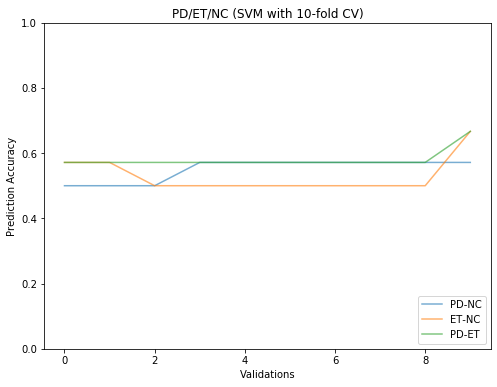

In [31]:
# prediciton with all freesurfer output features
# read corr data and function init
import numpy as np
def get_group(df, groups):
    res = df[(df["diagnosis"]==groups[0]) | (df["diagnosis"]==groups[1])];
    res['y'] = [1 if x == groups[0] else 0 for x in res['diagnosis']]
    res.drop(['diagnosis'], axis=1, inplace=True);
    res['sex'] = [1 if x == 'M' else 0 for x in res['sex'] ]
    return res
def cv_score(X, N_cv):
    from sklearn import svm
    from sklearn.model_selection import cross_val_score
    y = X['y'];
    data=X.drop(['y'], axis=1);
    clf = svm.SVC(kernel='sigmoid', C=1)
    scores = cross_val_score(clf, np.array(data), np.array(y), cv=N_cv)
    m_list= scores;
    return m_list

N_cv=10
# AD-IC ic in PD/NC in both datasets
#import matplotlib.pyplot as plt
pd_nc_data = get_group(tab_data, ["PD", "NC"])
et_nc_data = get_group(tab_data, ["ET", "NC"])
pd_et_data = get_group(tab_data, ["PD", "ET"])
res1 = cv_score(pd_nc_data, N_cv)
res2 = cv_score(et_nc_data, N_cv)
res3 = cv_score(pd_et_data, N_cv)
print(res1, res2, res3)
fig = plt.figure(figsize=[8, 6])
plt.plot(res1, alpha=.6, label='PD-NC')
plt.plot(res2, alpha=.6, label='ET-NC')
plt.plot(res3, alpha=.6, label='PD-ET')
plt.legend(loc='lower right')
plt.title('PD/ET/NC (SVM with 10-fold CV)')
plt.ylim(0, 1)
plt.ylabel("Prediction Accuracy")
plt.xlabel("Validations")
#  PD/NC: array([0.5, 0.5, 0.5, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857])
# PD/ET: 0.5714285714285714,  0.6666666666666666

In [154]:
n_score

array([0.52631579, 0.55555556, 0.55555556, 0.55555556])

In [ ]:
fig = plt.figure(figsize=[8, 6])
plt.errorbar(x, ad_mean, yerr=ad_var, alpha=.7, label='PPMI dataset')
plt.errorbar(x, ab_mean, yerr=ab_var, alpha=.7, label='Local dataset')
plt.legend(loc='lower right')
plt.title('PPMI-ICs for PD/NC classification (SVM with 10-fold CV)')
plt.ylim(0, 1)
plt.xlabel('PPMI ICs (30)')

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.05, 'Brain Structures: cerebrum, cerebellum, subcortical and brain-stem')

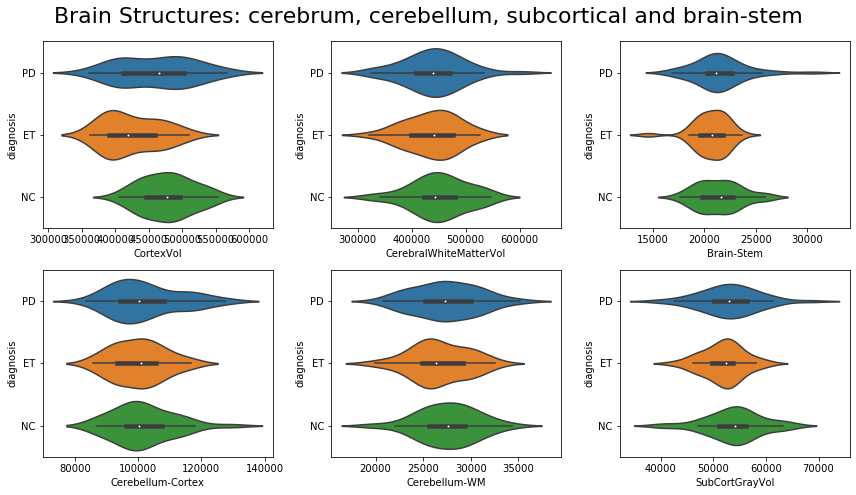

In [168]:
# distribution of basal ganglia
items_disp = ["diagnosis", "age", "sex", "eTIV", "CortexVol", "CerebralWhiteMatterVol",
              "Brain-Stem", "SubCortGrayVol"]
tmp_data = tab_data[items_disp]; 
tmp_data["Cerebellum-Cortex"] = tab_data["Left-Cerebellum-Cortex"]      +tab_data["Right-Cerebellum-Cortex"];
tmp_data["Cerebellum-WM"]     = tab_data["Left-Cerebellum-White-Matter"]+tab_data["Right-Cerebellum-White-Matter"];
items_disp=items_disp+["Cerebellum-Cortex", "Cerebellum-WM"]

from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1)
#
#ylim_2 = [300000, 600000]
sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h', inner='box', ax=axs[0, 0]); #axs[0,1].set_ylim(ylim_2);
#ylim_3 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 1]); #axs[1,0].set_ylim(ylim_3);
#ylim_4 = [10000, 35000];
sns.violinplot(y="diagnosis", x=items_disp[6], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 2]); #axs[1,1].set_ylim(ylim_2);
#ylim_5 = [30000, 80000];
sns.violinplot(y="diagnosis", x=items_disp[7], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 2]); #axs[2,0].set_ylim(ylim_3);
#ylim_6 = [70000, 140000];
sns.violinplot(y="diagnosis", x=items_disp[8], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 0]); #axs[2,1].set_ylim(ylim_3);
#ylim_4 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp[9], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 1]); #axs[3,0].set_ylim(ylim_4);
fig.suptitle('Brain Structures: cerebrum, cerebellum, subcortical and brain-stem', fontsize=22, x=0.5, y=1.05)
#
#plt.savefig('ad_group_corr_ic0.png')

Text(0.5, 1.02, 'Basal Ganglia: Caudate, Pallidum, Putamen, Thalamus')

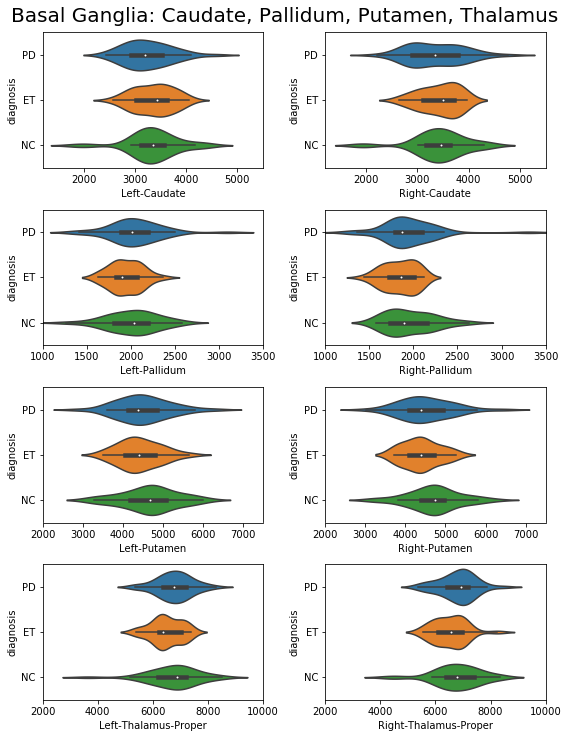

In [56]:
# distribution of basal ganglia
class_a1 = "Left-Caudate";  class_b1 = 'Left-Pallidum';  class_c1 = 'Left-Putamen';  class_d1 = 'Left-Thalamus-Proper';
class_a2 = "Right-Caudate"; class_b2 = 'Right-Pallidum'; class_c2 = 'Right-Putamen'; class_d2 = 'Right-Thalamus-Proper';
# SubCortGrayVol, Brain-Stem, Accumbens, CortexVol, TotalGrayVolCortexVol, CerebralWhiteMatterVol, EstimatedTotalIntraCranialVol
#
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2, figsize=(8,10), tight_layout=1)
#
ylim_1 = [1200,5500];
sns.violinplot(y="diagnosis", x=class_a1,  data=tab_data, orient='h', inner='box', ax=axs[0,0]);  axs[0,0].set_xlim(ylim_1);
sns.violinplot(y="diagnosis", x=class_a2, data=tab_data, orient='h', inner='box', ax=axs[0,1]); axs[0,1].set_xlim(ylim_1);
ylim_2 = [1000,3500];
sns.violinplot(y="diagnosis", x=class_b1, data=tab_data, orient='h', inner='box', ax= axs[1,0]); axs[1,0].set_xlim(ylim_2);
sns.violinplot(y="diagnosis", x=class_b2, data=tab_data, orient='h', inner='box', ax= axs[1,1]); axs[1,1].set_xlim(ylim_2);
ylim_3 = [2000,7500];
sns.violinplot(y="diagnosis", x=class_c1, data=tab_data, orient='h', inner='box', ax= axs[2,0]); axs[2,0].set_xlim(ylim_3);
sns.violinplot(y="diagnosis", x=class_c2, data=tab_data, orient='h', inner='box', ax= axs[2,1]); axs[2,1].set_xlim(ylim_3);
ylim_4 = [2000,10000];
sns.violinplot(y="diagnosis", x=class_d1, data=tab_data, orient='h', inner='box', ax= axs[3,0]); axs[3,0].set_xlim(ylim_4);
sns.violinplot(y="diagnosis", x=class_d2, data=tab_data, orient='h', inner='box', ax= axs[3,1]); axs[3,1].set_xlim(ylim_4);
fig.suptitle('Basal Ganglia: Caudate, Pallidum, Putamen, Thalamus', fontsize = 20, x=0.5, y=1.02)
#axs[1].alpha=0.3
#plt.savefig('ad_group_corr_ic0.png')

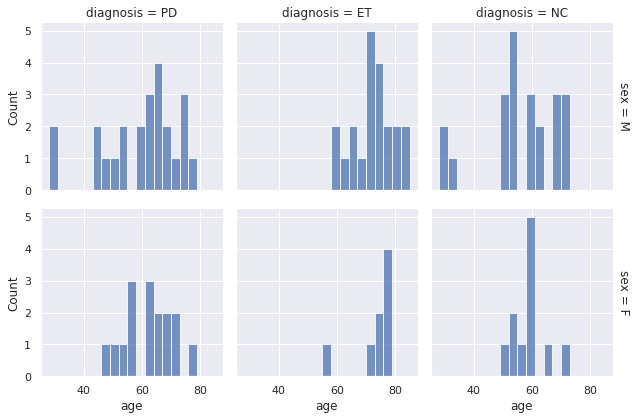

In [5]:
# test plots
import seaborn as sns
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    data, x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [ ]:
# plot tmp27 distribution 2*3
sns.set_theme(style="darkgrid")
sns.displot(
    data[''], x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [83]:
# template for 55-75, take first 19 of PD
res = sub_list.join(sf_lh, how='left')
res.join(vol_lh.iloc[:,0:-2], how='left')
sub_age57=sub_list[(sub_list['age']>=55) & (sub_list['age']<=75)]
import numpy as np
pd_57=list(sub_age57[sub_age57['diagnosis']=='PD'].index)[0:19]
et_57=list(sub_age57[sub_age57['diagnosis']=='ET'].index)
nc_57=list(sub_age57[sub_age57['diagnosis']=='NC'].index)
print('PD('+str(len(pd_57))+'): '+' '.join(pd_57))
print('ET('+str(len(et_57))+'): '+' '.join(et_57))
print('NC('+str(len(nc_57))+'): '+' '.join(nc_57))
sub_list57=pd_57+et_57+nc_57
sub57=sub_age57[sub_age57.index.isin(sub_list57)]
sub57.shape

PD(19): sub-0002 sub-0006 sub-0008 sub-0009 sub-0014 sub-0015 sub-0022 sub-0024 sub-0028 sub-0030 sub-0034 sub-0035 sub-0037 sub-0040 sub-0047 sub-0052 sub-0068 sub-0075 sub-0096
ET(19): sub-0081 sub-0119 sub-0122 sub-0134 sub-1120 sub-1230 sub-1310 sub-1340 sub-1450 sub-1500 sub-1890 sub-3700 sub-3900 sub-4200 sub-4700 sub-5700 sub-7000 sub-7400 sub-7800
NC(19): sub-0039 sub-0041 sub-0043 sub-0058 sub-0064 sub-0067 sub-0071 sub-0078 sub-0079 sub-0102 sub-0107 sub-0108 sub-0110 sub-0113 sub-0117 sub-0121 sub-0124 sub-0128 sub-0130


(57, 3)

In [160]:
## Merging all PD/ET/NC freesurfer outputs into one table. /output/all_freesurfer_out.csv
#reading subject list
import pandas as pd
import seaborn as sns
sub_list_file = '/codes/devel/subjects.list'
sub_list = pd.read_csv(sub_list_file, sep=',', header=0, index_col=0)

#reading freesurfer results
out_dir = '/output'
FS_DIR  = out_dir+'/freesurfer_output/'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
group_data={};
for i_group in range(n_groups):
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    sub_cortical_file = FS_DIR+GROUPS[i_group]+'/aseg_stats.txt';
    wm_file = FS_DIR+GROUPS[i_group]+'/wmparc_stats.txt'; 
    lh_area_file      = FS_DIR+GROUPS[i_group]+'/lh.a2009s.area.txt';      rh_area_file      = FS_DIR+GROUPS[i_group]+'/rh.a2009s.area.txt';
    lh_meancurv_file  = FS_DIR+GROUPS[i_group]+'/lh.a2009s.meancurv.txt';  rh_meancurv_file  = FS_DIR+GROUPS[i_group]+'/rh.a2009s.meancurv.txt';
    lh_thickness_file = FS_DIR+GROUPS[i_group]+'/lh.a2009s.thickness.txt'; rh_thickness_file = FS_DIR+GROUPS[i_group]+'/rh.a2009s.thickness.txt';
    lh_volume_file    = FS_DIR+GROUPS[i_group]+'/lh.a2009s.volume.txt';    rh_volume_file   = FS_DIR+GROUPS[i_group]+'/rh.a2009s.volume.txt';
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"];
    wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    area_drop1 = ["BrainSegVolNotVent"];                   area_drop2 = ["BrainSegVolNotVent", "eTIV"];
    meancurv_drop1  = ["BrainSegVolNotVent", "eTIV"];  meancurv_drop2 = ["BrainSegVolNotVent", "eTIV"];
    thickness_drop1 = ["BrainSegVolNotVent", "eTIV"]; thickness_drop2 = ["BrainSegVolNotVent", "eTIV"];
    volume_drop1    = ["BrainSegVolNotVent", "eTIV"];    volume_drop2 = ["BrainSegVolNotVent", "eTIV"];
    ##
    subcortical_tab  = pd.read_csv(sub_cortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res    = sub_list.join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    lh_area_tab = pd.read_csv(lh_area_file, sep='\t', header=0, index_col=0); lh_area_tab.drop(area_drop1, axis=1, inplace=True);
    rh_area_tab = pd.read_csv(rh_area_file, sep='\t', header=0, index_col=0); rh_area_tab.drop(area_drop2, axis=1, inplace=True);
    res2 = res1.join(lh_area_tab, how='left'); res3 = res2.join(rh_area_tab, how='left');
    lh_meancurv_tab = pd.read_csv(lh_meancurv_file, sep='\t', header=0, index_col=0); lh_meancurv_tab.drop(meancurv_drop1, axis=1, inplace=True);
    rh_meancurv_tab = pd.read_csv(rh_meancurv_file, sep='\t', header=0, index_col=0); rh_meancurv_tab.drop(meancurv_drop2, axis=1, inplace=True);
    res4 = res3.join(lh_meancurv_tab, how='left'); res5 = res4.join(rh_meancurv_tab, how='left');
    lh_thickness_tab = pd.read_csv(lh_thickness_file, sep='\t', header=0, index_col=0); lh_thickness_tab.drop(thickness_drop1, axis=1, inplace=True);
    rh_thickness_tab = pd.read_csv(rh_thickness_file, sep='\t', header=0, index_col=0); rh_thickness_tab.drop(thickness_drop2, axis=1, inplace=True);
    res6 = res5.join(lh_thickness_tab, how='left'); res7 = res6.join(rh_thickness_tab, how='left');
    lh_volume_tab = pd.read_csv(lh_volume_file, sep='\t', header=0, index_col=0); lh_volume_tab.drop(volume_drop1, axis=1, inplace=True);
    rh_volume_tab = pd.read_csv(rh_volume_file, sep='\t', header=0, index_col=0); rh_volume_tab.drop(volume_drop2, axis=1, inplace=True);
    res8 = res7.join(lh_volume_tab, how='left'); res9 = res8.join(rh_volume_tab, how='left');
    group_data[GROUPS[i_group]]=res9[res9['diagnosis']==GROUPS[i_group]]
all_data = pd.concat([group_data['PD'], group_data['ET'], group_data['NC']])
all_data.to_csv(out_dir+'/freesurfer_out.csv')

Reading  PD  freesurfer stats data...
Reading  ET  freesurfer stats data...
Reading  NC  freesurfer stats data...


/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



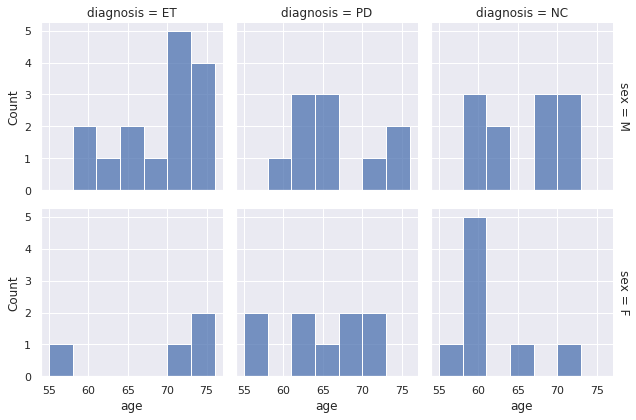

In [84]:
# plot tmp27 distribution 2*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    sub57, x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

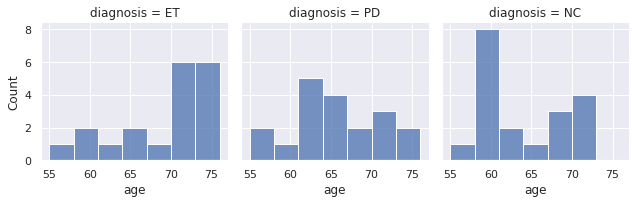

In [85]:
# plot tmp27 distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    sub57, x="age", col="diagnosis",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

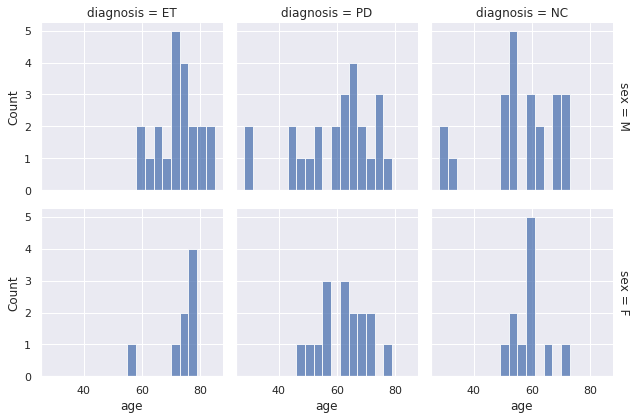

In [90]:
# plot all subject distribution 2*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
ax1=sns.displot(res, x="age", col="diagnosis", row="sex",
                binwidth=3, height=3, facet_kws=dict(margin_titles=True))

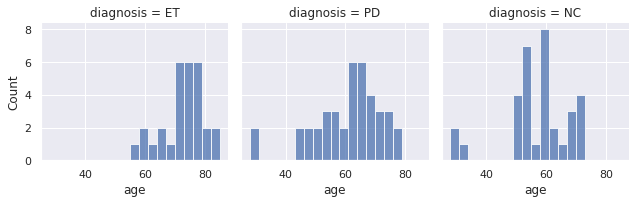

In [91]:
# plot all subject distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(res, x="age", col="diagnosis",
            binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [ ]:
# some test code
###
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    import matplotlib
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts
###

#fig, ax = plt.subplots()
#im, cbar = heatmap(np.array(x), x.columns, x.index, ax=ax,
#                   cmap="YlGn", cbarlabel="XXX [t/year]")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
#fig.tight_layout()
#plt.show()